In [4]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('group_gcc_lang.csv')
language = df.rename(columns={"rows/key/0": "Greater Capital City", "rows/key/1": "language", "rows/value": "Count"})
language


,Greater Capital City,language,Count
0,Australian Capital Territory (Canberra),ar,143
1,Australian Capital Territory (Canberra),art,76
2,Australian Capital Territory (Canberra),bg,3
3,Australian Capital Territory (Canberra),bn,2
4,Australian Capital Territory (Canberra),ca,123
...,...,...,...
436,Greater Sydney,vi,101
437,Greater Sydney,zh,11538
438,Greater Sydney,zxx,3564
439,Other Territory,en,40


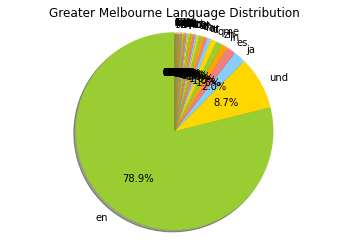

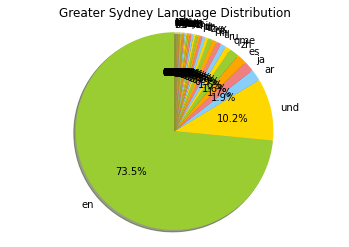

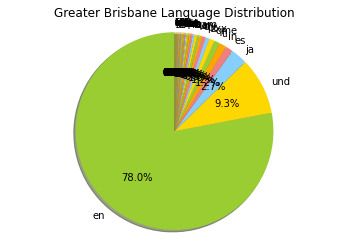

In [6]:
# 对数据进行分组和汇总，提取前三个语言数量最多的Greater Capital City
top_cities = language.groupby('Greater Capital City').sum().sort_values(by='Count', ascending=False).head(3)

# 计算每个城市中各语言的占比
top_cities['Percent'] = top_cities['Count'] / top_cities['Count'].sum() * 100

# 画出饼图
for city in top_cities.index:
    languages = language.loc[language['Greater Capital City'] == city, ['language', 'Count']].groupby('language').sum().sort_values(by='Count', ascending=False)
    labels = languages.index
    sizes = languages['Count']
    colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral', 'orange']
    #explode = (0.1, 0, 0, 0, 0)
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
    plt.axis('equal')
    plt.title(city + ' Language Distribution')
    plt.show()


In [8]:
df1 = pd.read_csv('How many curse words per language in each gcc.csv')
curse_language= df1.rename(columns={"rows/key/0": "Greater Capital City", "rows/key/1": "Curse Language", "rows/value": "Count"})
curse_language

,Greater Capital City,Curse Language,Count
0,Australian Capital Territory (Canberra),de,1
1,Australian Capital Territory (Canberra),en,1112
2,Australian Capital Territory (Canberra),es,21
3,Australian Capital Territory (Canberra),in,2
4,Australian Capital Territory (Canberra),tl,2
...,...,...,...
115,Greater Sydney,th,4
116,Greater Sydney,tl,52
117,Greater Sydney,tr,1
118,Greater Sydney,und,4
